# Acontinuacion se realiazara el analisis a una tienda de videojuegos el cual se analizara si un juego es exitoso o no 


En nuestro proyecto de análisis de datos, utilizaremos información histórica de ventas de videojuegos para identificar patrones que predigan el éxito de nuevos juegos. Nos centraremos en evaluar la influencia de factores como reseñas de usuarios y expertos, géneros, plataformas y clasificaciones ESRB, que indican el contenido adecuado para diferentes edades. Analizando estos datos, podremos identificar tendencias y características clave que ayuden a prever qué juegos tendrán un buen desempeño en el mercado y a planificar estrategias publicitarias efectivas.

En el conjunto de datos encontrarás información detallada sobre videojuegos, que incluye el nombre del juego, la plataforma en la que se lanzó, y el año de lanzamiento. Los datos también abarcan las ventas regionales, desglosadas en millones de dólares para Norteamérica, Europa, Japón y otros países. Además, se incluyen las puntuaciones de críticos y usuarios, con escalas de hasta 100 y 10, respectivamente, así como la clasificación ESRB, que indica el contenido adecuado para diferentes edades. Es importante tener en cuenta que los datos de 2016 pueden estar incompletos, lo que podría afectar el análisis y la interpretación de la información sobre los juegos lanzados en ese año.


En primer lugar se importa las librerias que se vayan a utilizar.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats as st 
import seaborn as sns
from scipy.stats import levene

Se procede a explorar el archivo que se va a utilizar para este analisis

In [4]:
#Se lee el dataframe que se va a emplear.
game=pd.read_csv('C:/Users/andre/Documents/TRIPLETEN ANALISIS DE DATOS/Proyectos/Proyecto_4/games.csv'
)

In [ ]:
#Con el metodo info() se tiene una rapida descripcion , de los nombres de las columnas , del tipo de dato y de
#si existen valores ausentes.
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Una ves que se tiene esta informacion presente, se procedere a usar el metodo snake_case con los nombres de las  columnas y de igual manera se procedera a reestablecer el tipo de dato segun la columna si lo requiera.

In [ ]:
#Convirtiendo los nombres de las columnas en metodo snake_case
#lista para reemplazar los nuevos valores de las columnas
new_columns=[]
#ciclo for para iterar sobre cada elemento de la columna
for old_columns in game.columns:
    lower = old_columns.lower()
    new_columns.append(lower)
#asignacion del reemplazo de valores de columna
game.columns=new_columns 

    

Antes de editar los tipo de datos en las columnas , primero se va a tratar los valores ausentes , ya que al convertir un tipo de dato es preferible no tener valores ausentes en estos. 
Acontinuacion se describiran las columnas que tienen valores ausentes a traves de una funcion:

In [ ]:
#Se define funcion que cuente los valores ausentes en todas las columnas
def ausentes(data,column_name):
    num_missing = data[column_name].isna().sum() # se usa el metodo isna para contar los valores ausentes
    print(f'Existen {num_missing} valores ausentes para la columna {column_name}') #se mostrara 
#Se imprimira los valores ausentes para las columnas especificas
for val_ausentes in game.columns:
    num_missing = game[val_ausentes].isna().sum() # se crea nuevamente la variable num_missing para contar los valores ausentes
    if num_missing > 0: #solo mostrara las columnas con valores ausentes 
        ausentes(game,val_ausentes) #Se llama a la funcion

Existen 2 valores ausentes para la columna name
Existen 269 valores ausentes para la columna year_of_release
Existen 2 valores ausentes para la columna genre
Existen 8578 valores ausentes para la columna critic_score
Existen 6701 valores ausentes para la columna user_score
Existen 6766 valores ausentes para la columna rating


Se puede evidenciar que existe un gran volumen de valores ausentes en diversas columnas, a continuacion se describira como se procedera con cada una y como sera rellenada.



In [ ]:
#En la columna name se reemplazara con NO_NAME, el motivo de sus valores puede ser por datos incompletos
game['name'].fillna('NO_NAME',inplace=True)

2007.0


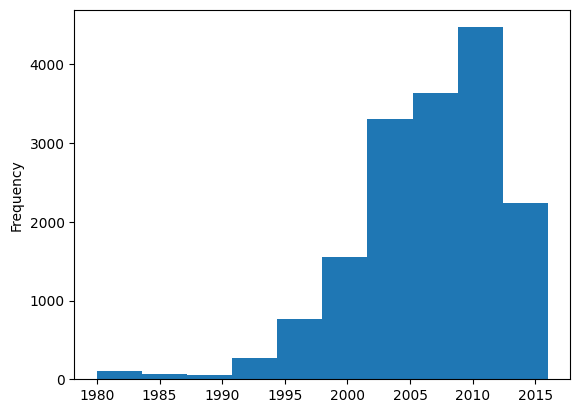

In [ ]:
#En la columna year_of_release se procedio a mirar con un histograma , la proporcion de los datos, y se puede ver 
#que existe una gran proporcion entre el 2000 al 2013, por tal razon se procedera a rellenar los valores ausentes
#con el valor medio que corresponde a 2007.
#se grafica un histograma para ver la proporcion de datos 
game['year_of_release'].plot(kind='hist')
#conocer el valor de la mediana
print(game['year_of_release'].median())
#reemplazar este valor de 2007 por los valores ausentes.
game['year_of_release'].fillna(2007,inplace=True)
#ahora se procedera a convertir los datos de tipo entero para poder quitar los decimales
game['year_of_release']=game['year_of_release'].astype(int)

<AxesSubplot:ylabel='Frequency'>

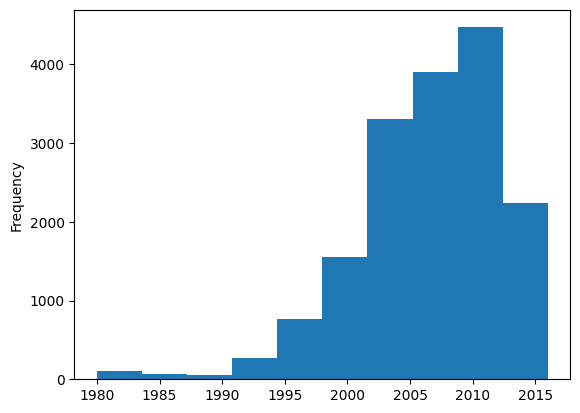

In [ ]:
game['year_of_release'].plot(kind='hist')

In [ ]:
#En la columna genre se reemplazara con NO_GENRE, el motivo de sus valores puede ser por datos incompletos
game['genre'].fillna('NO_GENRE',inplace=True)

Para la columna user_score se necesita tomar en cuenta los valores TBD , por lo que una ves que se contaron cuantos valores tbd existian , se tuvo un resultado de 2424 , acontinuacion estos valores TBD, Se tomaron en cuenta y se procedio a reemplazarlo por la media del conjunto de datos 


In [ ]:
#Se cuentan cuantos valores tbd existen 
print((game['user_score']=='tbd').sum())
#se imprime los valores unicos de la columna en el cual se puede observar tbd en ellos
print(game['user_score'].unique())


2424
['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


La columna es un tipo de dato objeto , por lo tanto no se puede realizar operaciones como el promedio o la mediana. En este caso se va a crear una nueva columna provisional , el cual eliminara las celdas tdb , luego se la convertira en un tipo de dato flotante y se procedera a conocer el valor de la mediana.

In [ ]:
#se crea nueva columna provisional
game['provisional_user_score']=game['user_score']

In [ ]:
# Reemplazar 'tbd' con NaN
game['provisional_user_score'].replace('tbd', np.nan, inplace=True)
# Convertir la columna a tipo flotante
game['provisional_user_score'] = game['provisional_user_score'].astype(float)
#se calcula el valor de la mediana
game['provisional_user_score'].median()

7.5

Ahora que ya se conoce cual es el valor de la mediana , se procedere a reemplazar este valor en los valores tbd en la columna original de user_score, y se eliminara la columna provisional que se creo.

In [ ]:
#Se realiza el cambio respectivo 
game['user_score'].replace('tbd',7.5,inplace=True)
#ahora se procedera a convertir esta columna en su tipo de dato correspondiente que es float
game['user_score']=game['user_score'].astype(float)
#se elimina la columna provisiona
game.drop('provisional_user_score', axis=1 , inplace=True)

Una ves que se tiene la columna user_score de tipo flotante y se reemplazaron los valores de tbd por la mediana , se procedera a eliminar las filas ya que se observa que son mas del 40 por ciento que tiene valores ausentes , por lo cual es un gran porcentaje que puede afectar el analisis. Ademas es importante mencionar que tanto user_score como critic_score y como rating tienen un gran porcentaje de valores ausentes en las mismas filas , por lo que se proceder a eliminarlas y luego con las columnas que aun tengan valores pendientes se las analizara para reemplazarlas con otros valores.

In [ ]:
#Se eliminan las filas con valores ausentes presente en la columnaa user_score
game.dropna(subset=['user_score'], inplace=True)
#Se observa rapidamente cuales valores ausentes aun tenemos presentes
game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10014 entries, 0 to 16706
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             10014 non-null  object 
 1   platform         10014 non-null  object 
 2   year_of_release  10014 non-null  int64  
 3   genre            10014 non-null  object 
 4   na_sales         10014 non-null  float64
 5   eu_sales         10014 non-null  float64
 6   jp_sales         10014 non-null  float64
 7   other_sales      10014 non-null  float64
 8   critic_score     8099 non-null   float64
 9   user_score       10014 non-null  float64
 10  rating           9878 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 938.8+ KB


En este caso se observa que la columna de critic_score y  de rating tiene aun valores ausentes , por lo que se procedera a analizarlos

In [ ]:
#Primero la columna de rating 
game['rating'].isna().sum()

136

Como es una columna categorica , los valores ausentes seran reemplazados por la moda. Y una ves finalizado esto , se tendran los datos limpios para poder analizarlos.

In [ ]:
#Se observa la moda
game['rating'].mode()

0    E
dtype: object

In [ ]:
#se reemplaza la columna con el valor de la moda
game['rating'].fillna('E', inplace=True)
#se obesrva que ya no existan valores ausentes en las columnas
game.info()
#contar valores duplicados en las columnas
game.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10014 entries, 0 to 16706
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             10014 non-null  object 
 1   platform         10014 non-null  object 
 2   year_of_release  10014 non-null  int64  
 3   genre            10014 non-null  object 
 4   na_sales         10014 non-null  float64
 5   eu_sales         10014 non-null  float64
 6   jp_sales         10014 non-null  float64
 7   other_sales      10014 non-null  float64
 8   critic_score     8099 non-null   float64
 9   user_score       10014 non-null  float64
 10  rating           10014 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 938.8+ KB


0

In [ ]:
#Ahora se analizara la columna critic_score
game['critic_score'].isna().sum()

1915

Es una columna que tiene 1915 valores ausentes. Para este caso estos valores ausentes seran reemplazados por la mediana.

In [ ]:
#Calculo de la mediana
game['critic_score'].median()

71.0

In [ ]:
#Reemplazando los valores
game['critic_score'].fillna(71 , inplace=True)

In [ ]:
#se obesrva que ya no existan valores ausentes en las columnas
game.info()
#contar valores duplicados en las columnas
game.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10014 entries, 0 to 16706
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             10014 non-null  object 
 1   platform         10014 non-null  object 
 2   year_of_release  10014 non-null  int64  
 3   genre            10014 non-null  object 
 4   na_sales         10014 non-null  float64
 5   eu_sales         10014 non-null  float64
 6   jp_sales         10014 non-null  float64
 7   other_sales      10014 non-null  float64
 8   critic_score     10014 non-null  float64
 9   user_score       10014 non-null  float64
 10  rating           10014 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 938.8+ KB


0

Ya se tienen listas las columnas sin valores ausentes y de igual manera se confirmo que no existian valores duplicados en el mismo , con esta informacion confirmada , se procedera a realizar el analisis respectivo.

In [ ]:
#se crea una nueva columna que contenga las ventas totales de todas las regiones 
game['total_sales']=game['na_sales'] + game['eu_sales'] + game['jp_sales'] 

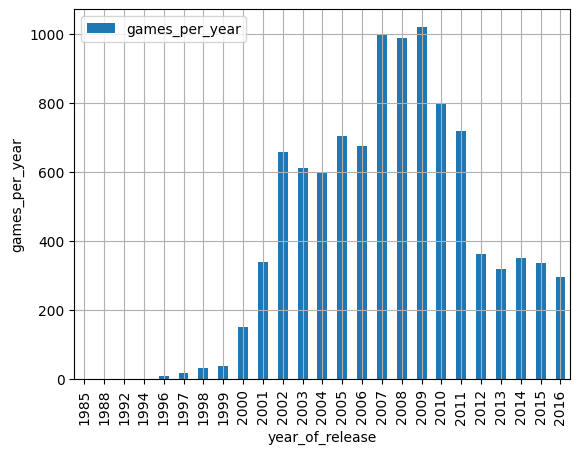

In [ ]:
#Se observa cuantos juegos fueron lanzados por ano
games_year=game.groupby('year_of_release')['name'].count().reset_index(name='games_per_year')
#se crea un grafico de barras para observar como con el pasar del tiempo ha variado los juegos lanzados por ano.
games_year.plot(kind='bar',x='year_of_release',y='games_per_year',ylabel='games_per_year')
plt.grid(True)

Aqui se puede observar cuantos juegos fueron lanzados por ano, en el cual en el 2009 fue el ano donde se lanzaron mucho mas juegos , y se ha podido observar qeu ese crecimiento se vio afectado en los siguientes anos porque las ventas bajaron significativamente.

<AxesSubplot:xlabel='platform', ylabel='Millones_de_dolares'>

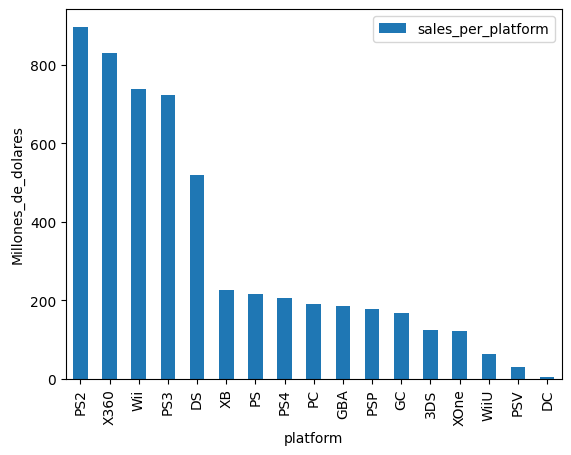

In [ ]:
# se procedera a observar como varian las ventas de una plataforma u otra, para esto se realizara lo siguiente'
sales_per_platform=game.groupby('platform')['total_sales'].sum().reset_index(name='sales_per_platform').sort_values(by='sales_per_platform', ascending=False)
#se realiaza un grafico para observar cual ha sido la plataforma con mayores ventas y las que le sigue
sales_per_platform.plot(kind = 'bar',x = 'platform', y = 'sales_per_platform',ylabel = 'Millones_de_dolares')


Aqui se puede observar que se tiene 4 principales plataformas con mayores ventas que superan los 800 millones de ventas , entre las cuales esta el PS2, X360 X PS3 Y EL WII. Ahora se procedera analizar cada una con un histograma para poder en que ano se hicieron populares.

(2000.0, 2005.0)

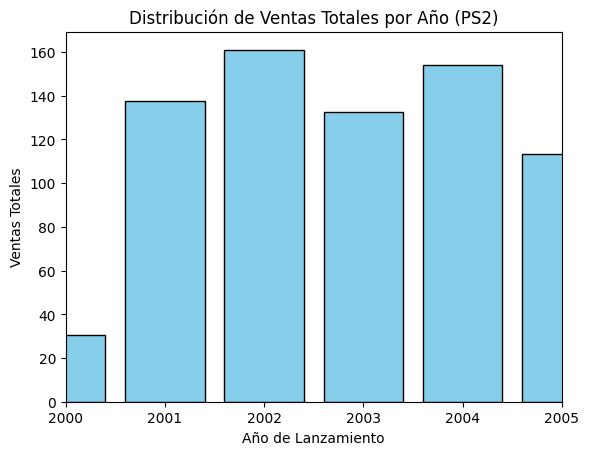

In [ ]:
#Filtro una nueevo data frame para que en platform solo esten los de PS2
filtro_ps2=game[game['platform']=='PS2']
sales_ps2_year=filtro_ps2.groupby('year_of_release')['total_sales'].sum().reset_index(name='ventas')
# Graficar una distribucion de las ventasd e ps2 a lo largo los anos.
plt.bar(sales_ps2_year['year_of_release'], sales_ps2_year['ventas'], color='skyblue', edgecolor='black')
plt.title('Distribución de Ventas Totales por Año (PS2)')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales')
plt.xlim(2000, 2005)



Para la plataforma de PS2, se puede ver que su ano de lanzamiento comenzo en el 2000 , y tuvo durante los proximos 5 anos , grandes ventas totales. Asi mismo despues de alcanzar su pico de ventas en el 2004 , fue decayendo hasta disminuir las ventas en el 2010.

(2006.0, 2011.0)

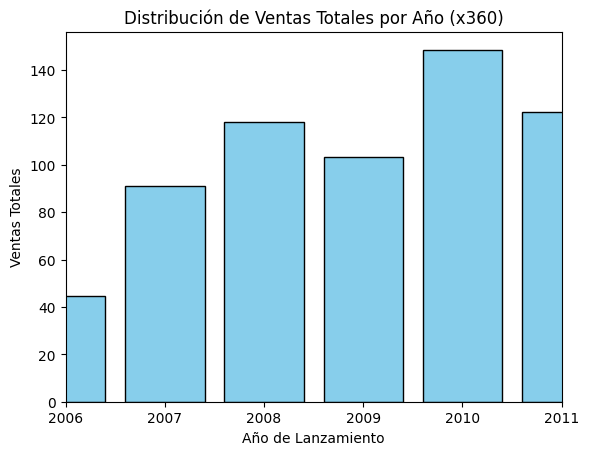

In [ ]:
#Filtro una nueevo data frame para que en platform solo esten los de x360
filtro_x360=game[game['platform']=='X360']
sales_x360_year=filtro_x360.groupby('year_of_release')['total_sales'].sum().reset_index(name='ventas')
# Graficar una distribucion de las ventasd e ps2 a lo largo los anos.
plt.bar(sales_x360_year['year_of_release'], sales_x360_year['ventas'], color='skyblue', edgecolor='black')
plt.title('Distribución de Ventas Totales por Año (x360)')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales')
plt.xlim(2006, 2011)

Para la plataforma de X360, se puede ver que su ano de lanzamiento comenzo en el 2005 con pocas ventas, luego sus ventas despegaron en el 2007 y 2008 , despues de esto sus ventas disminuyeron en el 2009 pero luego alcanzo su pico en el 2010 , donde posterior a esto ya sus ventas fueron disminuyendo.



(2006.0, 2011.0)

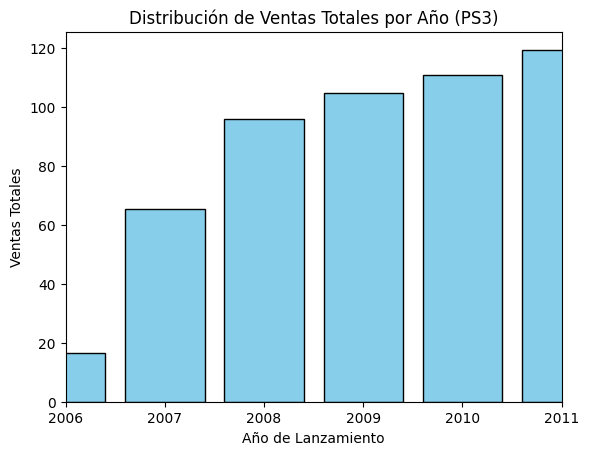

In [ ]:
#Se filtra una nueva variable para que solo esten presente los de PS3
filtro_ps3 = game[game['platform'] == 'PS3']
sales_ps3_year = filtro_ps3.groupby('year_of_release')['total_sales'].sum().reset_index(name='ventas')
#se grafica un grafico de barras para poder ver la distribucion de las ventas por anos
plt.bar(sales_ps3_year['year_of_release'], sales_ps3_year['ventas'] , color='skyblue', edgecolor='black')
plt.title('Distribución de Ventas Totales por Año (PS3)')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales')

plt.xlim(2006, 2011)

Para la plataforma de PS3, se puede ver que su ano de lanzamiento comenzo en el 2006 , y sus mejores ventas las desarrollo entre el 2008 y el 2011. Luego de su pico en el 2011 , las ventas decayeron en el 2012 pero luego aumento un pequeno porcentaje en el 2013 y en los proximos anos siguio cayendo.

(2005.0, 2020.0)

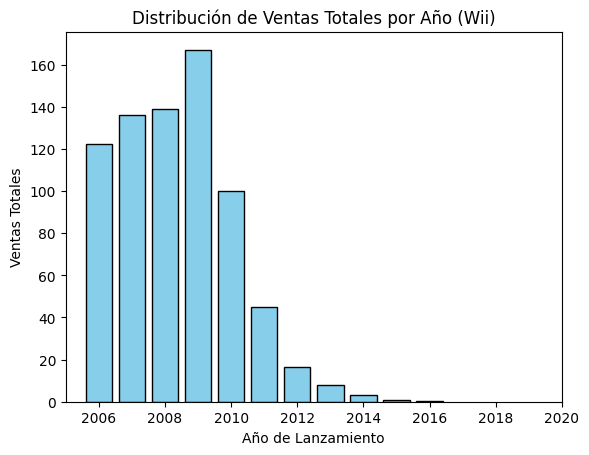

In [ ]:
#Se crea un nuevo dataframe para filtrar ahora para la plataforma de wii
filtro_wii = game[game['platform'] == 'Wii']
#se agrupara para ver segun las ventas totales con el ano de lanzamiento
sales_wii_year = filtro_wii.groupby('year_of_release')['total_sales'].sum().reset_index(name='ventas')
#se grafica un grafico de barras para poder ver la distribucion de las ventas por anos
plt.bar(sales_wii_year['year_of_release'], sales_wii_year['ventas'] , color='skyblue', edgecolor='black')
plt.title('Distribución de Ventas Totales por Año (Wii)')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales')
plt.xlim(2005, 2020)

Para la plataforma de WII, se puede ver que su ano de lanzamiento comenzo en el 2006 con buenas ventas , y estas aumentando hasta el 2009 donde alcanzo su pico de ventas. Luego fueron decayendo sus ventas en los proximos anos hasta el 2016.

Es importante mencionar que para el analisis de estas plataforma , se ha podido observar que el periodo de existencia de las plataformas tiene un promedio de 10 anos de duracion. Desde que tiene su lanzamiento hasta desaparecer , generando minimas ventas que son insignificativas.

In [ ]:
game.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,10014.000000,10014.000000,10014.000000,10014.000000,10014.000000,10014.000000,10014.000000,10014.000000
mean,2007.618734,0.315357,0.180990,0.045448,0.064011,69.362692,7.215808,0.541795
std,4.080538,0.818004,0.580825,0.240079,0.227530,12.557089,1.315720,1.479349
min,1985.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2005.000000,0.050000,0.010000,0.000000,0.010000,63.000000,6.800000,0.080000
50%,2008.000000,0.120000,0.040000,0.000000,0.020000,71.000000,7.500000,0.190000
75%,2010.000000,0.300000,0.150000,0.000000,0.050000,77.000000,8.000000,0.500000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,98.000000,9.700000,74.090000


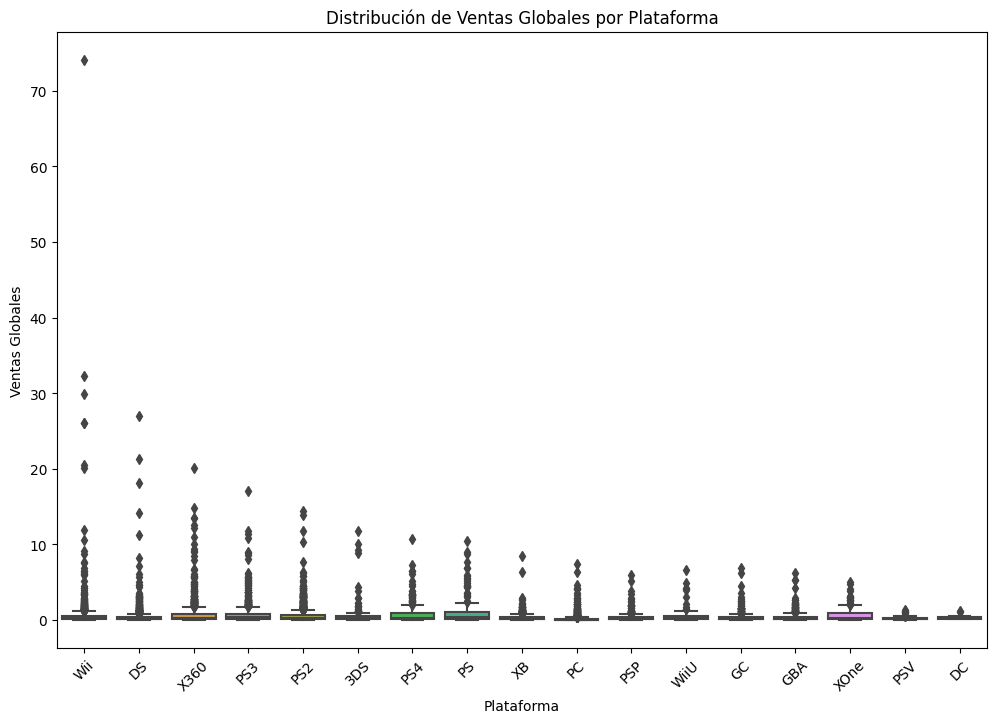

In [ ]:
#Se va a crear un diagrama de caja y bigotes para todas las plataformas
plt.figure(figsize=(12, 8))

# Crear el diagrama de caja usando las columnas de platform y total_sales
sns.boxplot(data=game, x='platform', y='total_sales')

# Añadir título y etiquetas
plt.title('Distribución de Ventas Globales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales')
#plt.ylim(0, 6)
# Rotar etiquetas del eje x para mejor visualización si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

En el diagrama de caja y bigotes de las ventas globales por plataforma, se observa la distribución de las ventas para cada plataforma, mostrando cuartiles, medianas y outliers. Las cajas representan la variabilidad intercuartílica, mientras que los bigotes indican el rango de datos dentro de 1.5 veces el rango intercuartílico. Las diferencias significativas en la mediana entre plataformas sugieren variaciones en el desempeño de ventas, con algunas plataformas mostrando mayores fluctuaciones y valores atípicos. Analizar estos diagramas ayuda a identificar plataformas con ventas más estables o extremas, ofreciendo una visión clara de la distribución y el comportamiento de ventas.

Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

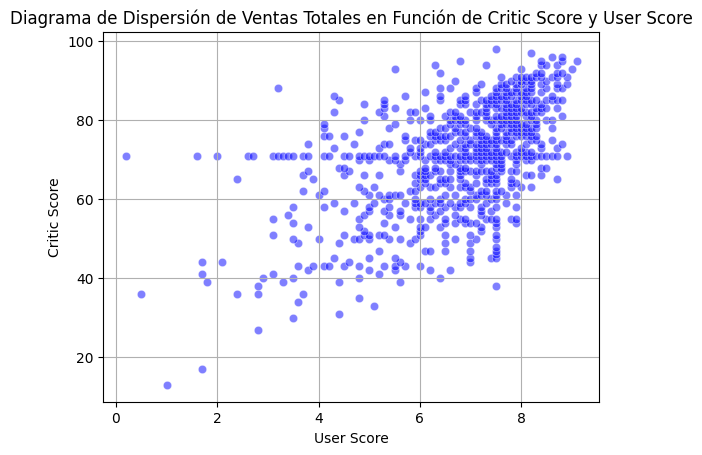

La correlacion es igual a: 0.23398013575653853


In [ ]:
#Para este caso se va a tomar en cuenta las ventas de PS3.
#En este dataframe solo se tiene la tabla con la plataforma especificada en filtro_ps3
filtro_ps3 
#se crea un nuevo dataframe el cual este agrupado por critic_score y user_sore 
resenas_usu_pro=filtro_ps3.groupby(['critic_score','user_score'])['total_sales'].sum().reset_index()
#Se crea el grafico de dispersion 
plt.scatter(resenas_usu_pro['user_score'], resenas_usu_pro['critic_score'], alpha=0.5, c='blue', edgecolors='w', linewidth=0.5)

# Añadir título y etiquetas
plt.title('Diagrama de Dispersión de Ventas Totales en Función de Critic Score y User Score')
plt.xlabel('User Score')
plt.ylabel('Critic Score')

# Mostrar la gráfica
plt.grid(True)
plt.show()
correlacion=game['critic_score'].corr(game['total_sales'])
print(f'La correlacion es igual a: {correlacion}')

Se puede ver que la correlacion que existe entre los comentarios de los usuarios y las ventas es baja.

Ahora se procedera a analizar los juegos mas vendidos y de igual manera que juegos se han vendido mas en cada plataforma con mayres ventas.

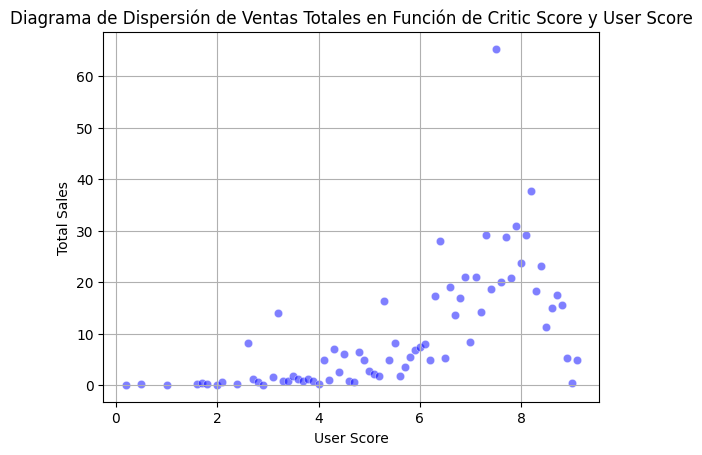

La correlacion es igual a: 0.07075927247172466


In [ ]:
# para user score
#Para este caso se va a tomar en cuenta las ventas de PS3.
#En este dataframe solo se tiene la tabla con la plataforma especificada en filtro_ps3
filtro_ps3 
#se crea un nuevo dataframe el cual este agrupado por critic_score y user_sore 
resenas_usu_sales=filtro_ps3.groupby('user_score')['total_sales'].sum().reset_index()
#Se crea el grafico de dispersion 
plt.scatter(resenas_usu_sales['user_score'], resenas_usu_sales['total_sales'], alpha=0.5, c='blue', edgecolors='w', linewidth=0.5)

# Añadir título y etiquetas
plt.title('Diagrama de Dispersión de Ventas Totales en Función de Critic Score y User Score')
plt.xlabel('User Score')
plt.ylabel('Total Sales')

# Mostrar la gráfica
plt.grid(True)
plt.show()
correlacion=game['user_score'].corr(game['total_sales'])
print(f'La correlacion es igual a: {correlacion}')

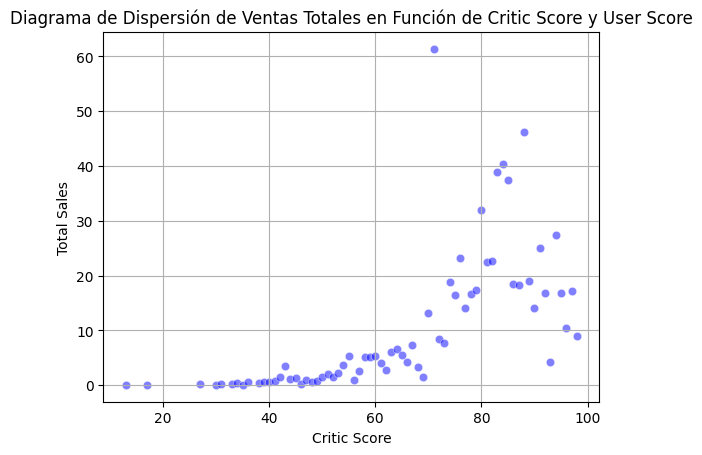

La correlacion es igual a: 0.23398013575653853


In [ ]:
# para critic_score
#Para este caso se va a tomar en cuenta las ventas de PS3.
#En este dataframe solo se tiene la tabla con la plataforma especificada en filtro_ps3
filtro_ps3 
#se crea un nuevo dataframe el cual este agrupado por critic_score y user_sore 
resenas_cri_sales=filtro_ps3.groupby('critic_score')['total_sales'].sum().reset_index()
#Se crea el grafico de dispersion 
plt.scatter(resenas_cri_sales['critic_score'], resenas_cri_sales['total_sales'], alpha=0.5, c='blue', edgecolors='w', linewidth=0.5)

# Añadir título y etiquetas
plt.title('Diagrama de Dispersión de Ventas Totales en Función de Critic Score y User Score')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')

# Mostrar la gráfica
plt.grid(True)
plt.show()
correlacion=game['critic_score'].corr(game['total_sales'])
print(f'La correlacion es igual a: {correlacion}')

In [ ]:
#Se agrupa los videos juegos por sus ventas 
game_sales = game.groupby('name')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)

In [ ]:
game_sales.head(10)

,name,total_sales
5882,Wii Sports,74.09
2102,Grand Theft Auto V,48.68
2982,Mario Kart Wii,32.23
5884,Wii Sports Resort,29.82
708,Call of Duty: Black Ops,27.51
714,Call of Duty: Modern Warfare 3,27.31
3632,New Super Mario Bros.,26.92
3635,New Super Mario Bros. Wii,26.08
5880,Wii Play,26.07
709,Call of Duty: Black Ops II,25.64


En este caso se puede observar los 10 juegos mas vendidos sin tener en cuenta alguna plataforma en especifico. Ahora se va a ver cuales son los juegos mas vendidos para las 4 plataformas que hay.

In [ ]:
#Se crea para filtro ps2 
game_filtro_ps2=filtro_ps2.groupby('name')['total_sales'].sum().reset_index().sort_values(by= 'total_sales', ascending=False)
game_filtro_ps2.head(10)

,name,total_sales
465,Grand Theft Auto: Vice City,14.37
459,Gran Turismo 3: A-Spec,13.81
462,Grand Theft Auto III,11.80
464,Grand Theft Auto: San Andreas,10.24
381,Final Fantasy X,7.71
595,Kingdom Hearts,6.33
879,Need for Speed Underground,6.18
700,Medal of Honor: Frontline,5.85
880,Need for Speed Underground 2,5.81
711,Metal Gear Solid 2: Sons of Liberty,5.33


Se ven los 10 juegos mas vendidos para el PS2 , El cual destaca GTA:San Andreas

In [ ]:
#Se crea para filtro X360
game_filtro_x360=filtro_x360.groupby('name')['total_sales'].sum().reset_index().sort_values(by= 'total_sales', ascending=False)
game_filtro_x360.head(10)

,name,total_sales
447,Kinect Adventures!,20.13
369,Grand Theft Auto V,14.86
134,Call of Duty: Black Ops,13.49
138,Call of Duty: Modern Warfare 3,13.41
135,Call of Duty: Black Ops II,12.56
137,Call of Duty: Modern Warfare 2,12.19
387,Halo 3,10.91
368,Grand Theft Auto IV,9.97
136,Call of Duty: Ghosts,9.33
392,Halo: Reach,9.07


Se ven los 10 juegos mas vendidos para el  x360 , El cual destaca kinect Adventures!

In [ ]:
#Se crea para filtro ps3 
game_filtro_ps3=filtro_ps3.groupby('name')['total_sales'].sum().reset_index().sort_values(by= 'total_sales', ascending=False)
game_filtro_ps3.head(10)

,name,total_sales
318,Grand Theft Auto V,17.09
117,Call of Duty: Modern Warfare 3,11.76
114,Call of Duty: Black Ops II,11.37
113,Call of Duty: Black Ops,10.84
116,Call of Duty: Modern Warfare 2,9.01
317,Grand Theft Auto IV,8.89
313,Gran Turismo 5,8.59
115,Call of Duty: Ghosts,8.11
264,FIFA Soccer 13,6.20
56,Battlefield 3,6.09


Se ven los juegos mas vendidos para el PS3 en el cual se puede observar el GTA 5.

In [ ]:
#Se crea para filtro wii
game_filtro_wii=filtro_wii.groupby('name')['total_sales'].sum().reset_index().sort_values(by= 'total_sales', ascending=False)
game_filtro_wii.head(10)

,name,total_sales
962,Wii Sports,74.09
495,Mario Kart Wii,32.23
963,Wii Sports Resort,29.82
600,New Super Mario Bros. Wii,26.08
960,Wii Play,26.07
956,Wii Fit,20.55
957,Wii Fit Plus,20.03
818,Super Smash Bros. Brawl,11.83
813,Super Mario Galaxy,10.61
415,Just Dance 3,9.06


Y se observa los juegos mas vendidos para la plataforma de WII.

Se puede observar que entre las consolas de PS2 Y PS3 , algunos de sus juegos se repiten como mayores ventas, juegos que ya han salido una ves y que sale una nueva version de ellas. Mientras que en Wii y X360 son juegos mas personalizados , especialmente en el Wii que son juegos mas de la consola.

Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

In [ ]:
#Ver los generos mas populares segun sus ventas
popular_genre = game.groupby('genre')['total_sales'].sum().reset_index().sort_values(by='total_sales',ascending=False)

<AxesSubplot:title={'center':'Generos mas populares segun sus ventas'}, xlabel='Generos de video juegos ', ylabel='Ventas en millones'>

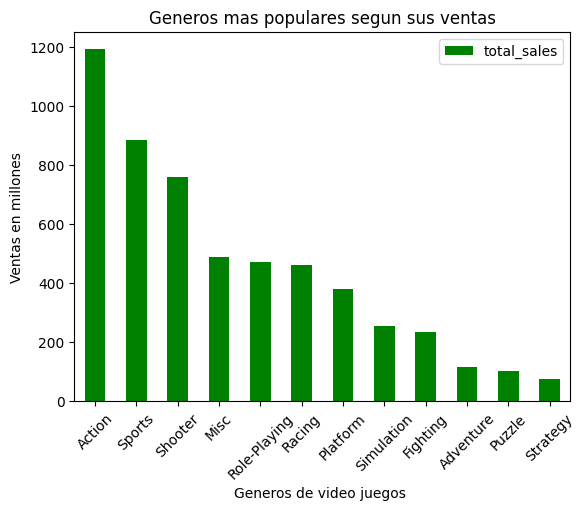

In [ ]:
#grafico para mostrar los generos mas populares
popular_genre.plot(kind='bar', x='genre', y='total_sales' , xlabel='Generos de video juegos ', ylabel= 'Ventas en millones',
                  title= 'Generos mas populares segun sus ventas', rot =45 , color = 'green')

Se puede observar las ventas por genero , las cuales hay que destacar que los generos preferidos por los usuarios segun sus ventas son de accion , de deporte y de disparo. Mientas que los 3 generos menos vendidos son de aventura , de rompecabezas y de estrategia.

Ahora que se ha analizado toda la informacion en conjunto se procedera a analizar por region como es el comportamiento de los usuarios. Las tres regiones seran de Norte America , Japon , y Europa.

In [ ]:
jp_platform = game.groupby('platform')['jp_sales'].sum().reset_index().sort_values(by='jp_sales',ascending = False).reset_index(drop=True)

In [ ]:
jp_platform.head()

,platform,jp_sales
0,DS,87.15
1,PS2,78.40
2,PS3,59.74
3,Wii,53.19
4,PS,40.53


In [ ]:
na_platform = game.groupby('platform')['na_sales'].sum().reset_index().sort_values(by='na_sales',ascending = False).reset_index(drop=True)

In [ ]:
na_platform.head()

,platform,na_sales
0,X360,571.72
1,PS2,525.95
2,Wii,452.24
3,PS3,368.05
4,DS,295.38


In [ ]:

eu_platform = game.groupby('platform')['eu_sales'].sum().reset_index().sort_values(by='eu_sales',ascending = False).reset_index(drop=True)

In [ ]:
eu_platform.head()

,platform,eu_sales
0,PS3,295.73
1,PS2,292.26
2,X360,248.84
3,Wii,233.04
4,DS,136.11


Se puede observar como por region ha cambiado el primer lugar de las plataforma. Pero en las 3 regiones se puede observar como el PS2 ha sido la consola que se ha mantenido como segundo lugar segun sus ventas. De igual manera en sus 3 regiones se puede decir que casi son las mismas plataformas que estan presente. Solo es Japon el estado donde no esta la x360 y se tiene al PS como uno dentro de sus Top 5.

In [ ]:
#Ahora se va a sacar sus cuotas de cada una para conocer como han sido sus ventas en funcion de las ventas totales
#para japon 
total_sales_jp= game['jp_sales'].sum()
print(f'Las ventas totales de Japon son {round(total_sales_jp,2)}')
#Para USA
total_sales_na= game['na_sales'].sum()
print(f'Las ventas totales de USA son {round(total_sales_na,2)}')
#Para Europa
total_sales_eu= game['eu_sales'].sum()
print(f'Las ventas totales de Europa son {round(total_sales_eu,2)}')
#Para todas las regiones 
total=game['total_sales'].sum()
print(f'Las ventas totales son {round(total,2)}')


Las ventas totales de Japon son 455.12
Las ventas totales de USA son 3157.99
Las ventas totales de Europa son 1812.43
Las ventas totales son 5425.54


In [ ]:
print(f'La cuota de japon es {total_sales_jp/total}')
print(f'La cuota de Usa es {total_sales_na/total}')
print(f'La cuota de Europa es {total_sales_eu/total}')

La cuota de japon es 0.08388473774039079
La cuota de Usa es 0.5820600345772033
La cuota de Europa es 0.33405522768240575


Se puede ver como la presencia de Estados  Unidos marca una diferencia entre las otras regiones , teniendo una cuota de venta de 0.58.

In [ ]:
#para Japon
clasificacion_jp = game.groupby('rating')['jp_sales'].sum().reset_index().sort_values(by='jp_sales' , ascending=False).reset_index(drop=True)
clasificacion_jp

,rating,jp_sales
0,E,199.57
1,T,149.83
2,M,64.18
3,E10+,40.08
4,K-A,1.46
5,AO,0.00
6,EC,0.00
7,RP,0.00


In [ ]:
#para USA
clasificacion_na = game.groupby('rating')['na_sales'].sum().reset_index().sort_values(by='na_sales' , ascending=False).reset_index(drop=True)
clasificacion_na

,rating,na_sales
0,E,1294.24
1,T,757.13
2,M,747.95
3,E10+,353.32
4,K-A,2.56
5,EC,1.53
6,AO,1.26
7,RP,0.00


In [ ]:
#para Europa
clasificacion_eu = game.groupby('rating')['eu_sales'].sum().reset_index().sort_values(by='eu_sales' , ascending=False).reset_index(drop=True)
clasificacion_eu

,rating,eu_sales
0,E,716.52
1,M,482.94
2,T,423.54
3,E10+,188.37
4,AO,0.61
5,K-A,0.27
6,EC,0.11
7,RP,0.07


Se puede ver realmente como en las 3 regiones , predomina el ranking 'E', y de igual manera los primeros 3 en las 3 regiones son el E,M,T. Se puede concluir que si comparten bastante similitud las 3 regiones con respecto al ranking.

Ahora se va a hacer una prueba de hipotesis  en relacion a dos plataformas , en el cual mantendremos lo siguiente:

Hipotesis Nula: No hay diferencia en las calificaciones promedio de usuarios entre las plataformas "Xone" y "PC".

Hipotesis Alternativa: Hay una diferencia en las calificaciones promedio de usuarios entre las plataformas "Xone" y "PC".

In [ ]:
#se crea una funcion para tomar en cuenta los outliers que existen.
def remove_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return data[(data >= (Q1 - 1.5 * IQR)) & (data <= (Q3 + 1.5 * IQR))]

# Filtrar los datos por plataforma
filtro_xone = game[game['platform'] == 'XOne']
filtro_pc = game[game['platform'] == 'PC']

# Obtener los puntajes de usuarios para cada plataforma
record_users_x = filtro_xone['user_score']
record_users_pc = filtro_pc['user_score']

# Limpiar los datos eliminando outliers
clean_record_users_x = remove_outliers(record_users_x)
clean_record_users_pc = remove_outliers(record_users_pc)

# Realizar la prueba de Levene con los datos limpios
estadistico_levene_p, p_value_levene_p = st.levene(clean_record_users_x, clean_record_users_pc)
print("Estadístico de Levene:", estadistico_levene_p)
print("Valor p de Levene:", p_value_levene_p)

# Definir el nivel de significancia
alpha = 0.05

# Decidir si asumir varianzas iguales o no
if p_value_levene_p < alpha:
    equal_var = False
    print("Se rechaza la hipótesis de varianzas iguales.")
else:
    equal_var = True
    print("No se rechaza la hipótesis de varianzas iguales.")

# Realizar la prueba de t con los datos limpios
prueba_hipotesis_p = st.ttest_ind(clean_record_users_x, clean_record_users_pc, equal_var=equal_var)
print("Estadístico de la prueba t:", prueba_hipotesis_p.statistic)
print("Valor p de la prueba t:", prueba_hipotesis_p.pvalue)

# Decidir si rechazar o no la hipótesis nula
if prueba_hipotesis_p.pvalue < alpha:
    print('Se rechaza la hipótesis nula')
else:
    print('No se rechaza la hipótesis nula')

Estadístico de Levene: 0.1669707080364554
Valor p de Levene: 0.68290866008032
No se rechaza la hipótesis de varianzas iguales.
Estadístico de la prueba t: -5.35258119437921
Valor p de la prueba t: 1.083164872978578e-07
Se rechaza la hipótesis nula


Ahora se va a hacer una prueba de hipotesis en relacion a dos generos , en el cual mantendremos lo siguiente:

Hipotesis Nula: No hay diferencia en las calificaciones promedio de usuarios entre los géneros "Action" y "Sports".

Hipotesis Alternativa: Hay una diferencia en las calificaciones promedio de usuarios entre los géneros "Action" y "Sports".

In [ ]:
#se crea otra funcion para poder intervenir con  los outliers
def remove_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return data[(data >= (Q1 - 1.5 * IQR)) & (data <= (Q3 + 1.5 * IQR))]
#filtro para los generos 
filtro_actions = game[game['genre'] == 'Action']
filtro_sports = game[game['genre'] == 'Sports']

#obtener los puntajes de los usuarios 
genre_users_ac = filtro_actions['user_score']
genre_users_sp = filtro_sports['user_score']
# Limpiar los datos eliminando outliers
clean_genre_users_ac = remove_outliers(genre_users_ac)
clean_genre_users_sp = remove_outliers(genre_users_sp)

# Realizar la prueba de Levene con los datos limpios
estadistico_levene, p_value_levene = st.levene(clean_genre_users_ac, clean_genre_users_sp)
print("Estadístico de Levene:", estadistico_levene)
print("Valor p de Levene:", p_value_levene)

# Definir el nivel de significancia
alpha = 0.05

# Decidir si asumir varianzas iguales o no
if p_value_levene < alpha:
    equal_var = False
    print("Se rechaza la hipótesis de varianzas iguales.")
else:
    equal_var = True
    print("No se rechaza la hipótesis de varianzas iguales.")

# Realizar la prueba de t con los datos limpios
prueba_hipotesis = st.ttest_ind(clean_genre_users_ac, clean_genre_users_sp, equal_var=equal_var)
print("Estadístico de la prueba t:", prueba_hipotesis.statistic)
print("Valor p de la prueba t:", prueba_hipotesis.pvalue)

# Decidir si rechazar o no la hipótesis nula
if prueba_hipotesis.pvalue < alpha:
    print('Se rechaza la hipótesis nula')
else:
    print('No se rechaza la hipótesis nula')

Estadístico de Levene: 20.738864102123642
Valor p de Levene: 5.4457033024810644e-06
Se rechaza la hipótesis de varianzas iguales.
Estadístico de la prueba t: -2.857668594149614
Valor p de la prueba t: 0.00429571355576891
Se rechaza la hipótesis nula


Se está utilizando una prueba t para muestras independientes, que permite comparar las medias de calificaciones de usuarios entre dos plataformas distintas y asi mismo entre dos generos diferentes. Esta prueba es adecuada para determinar si las diferencias observadas en las calificaciones son estadísticamente significativas, asumiendo varianzas desiguales entre los grupos.

En la primera parte del análisis, se rechazó la hipótesis nula, lo que indica que existe una diferencia significativa en las calificaciones promedio entre las plataformas "XOne" y "PC". Esto sugiere que las calificaciones de usuarios para estas dos plataformas no son iguales y que al menos una de ellas tiene calificaciones significativamente diferentes.

En la segunda parte, se rechazó la hipótesis nula, indicando que hay una diferencia estadísticamente significativa en las calificaciones promedio entre los géneros "Action" y "Sports". Esto sugiere que, en términos de calificaciones de usuarios, ambos géneros tienen promedios diferentes, lo que indica que los usuarios perciben los géneros de manera distinta.